# Assignment 3: Loan Prediction, Nicholas Petr, MSCA 31008 5 Data Mining Principles

Resources:

https://www.kaggle.com/junkal/selecting-the-best-regression-model

## Load packages, functions, and training dataset

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# Importing Classifier Modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV

In [2]:
def grid(x_var):
    sns.set(style="whitegrid")
    g = sns.PairGrid(data=df, x_vars=[x_var], y_vars='X1', size=5)
    g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
    g.set(ylim=(0, 1))

In [3]:
def money_numeric(col):
    df[col] = df[col].str.strip('$')
    df[col] = df[col].str.strip(',')
    df[col] = pd.to_numeric(df[col])

# Extract random 10% of dataframe to increase processing speed. We will comment this out later once the data has been cleaned and run through modeling

In [3]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')
#df = df.sample(frac=0.1)

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


## Check null values in dataset.

### We see that Cabin is largely empty, meaning it is most likely beyond the point of imputation. Age is missing some values, but will likely be an important variable, so we will use imputation. 

In [5]:
len(df)

40000

### After reviewing the dataset and corresponding column names, the following can immediately be dropped due to irrelevance: X2, X3, X10, X15, X18, X23

### Drop any rows where interest rate (X1) is not populated 

In [6]:
df = df[df['X1'].notna()]
len(df)

33798

### X16, X25, and X26 are largely unpopulated, so we will drop. 

In [7]:
# check the number of null values our dataset has.
df.isnull().sum()

X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8      5158
X9      5158
X10     2052
X11     1496
X12     5291
X13     5140
X14        0
X15        0
X16    23404
X17        0
X18        3
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    18326
X26    29460
X27        0
X28        0
X29        0
X30       21
X31        0
X32        0
dtype: int64

## Review columns where there is some missing data, or we are unclear about what value is being provided to determine what can be dropped from the dataset

### Loan Grade (X8) will be important, so we will convert to numeric and imputate 

In [8]:
df['X8'].value_counts()

B    8580
C    7682
D    4698
A    4483
E    2158
F     832
G     207
Name: X8, dtype: int64

In [9]:
df['X8'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)

## NOTE: For imputation of categorical variables, I am using mode once converted to numeric, as this indicates the most frequent entry for the column

In [10]:
df['X8'].fillna(df['X8'].mode()[0], inplace=True)

### Loan subgrade has a substantial amount of unique values, and appears to be a sub-classification of X8, so we will remove 

In [11]:
df['X9'].value_counts()

B3    2034
B4    1913
C2    1689
B2    1660
B5    1588
C1    1565
C3    1564
C4    1453
C5    1411
B1    1385
A5    1331
D1    1206
A4    1131
D2    1060
D3     892
D4     857
A3     727
D5     683
A1     653
A2     641
E1     563
E2     527
E3     447
E4     342
E5     279
F1     248
F2     187
F3     176
F4     122
F5      99
G2      63
G1      62
G4      28
G5      27
G3      27
Name: X9, dtype: int64

### Convery X11 to numeric and imputate 

In [12]:
df['X11'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [13]:
df['X11'].fillna(df['X11'].mode()[0], inplace=True)

### Convert X12 to numeric and imputate

In [14]:
df['X12'].replace(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [15]:
df['X12'].fillna(df['X12'].mode()[0], inplace=True)

### Imputate X13

In [16]:
df['X13'].fillna(df['X13'].mean(), inplace = True)

### Convert X30 to numeric and imputate 

In [17]:
df['X30'] = df['X30'].str.strip('%')

In [18]:
df['X30'] = pd.to_numeric(df['X30'])

In [19]:
df['X30'].fillna(df['X30'].mean(), inplace = True)

## Confirm Null values have been imputated (we see that there are a few null values in most columns

In [20]:
df.isnull().sum()

X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9      5158
X10     2052
X11        0
X12        0
X13        0
X14        0
X15        0
X16    23404
X17        0
X18        3
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    18326
X26    29460
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
dtype: int64

## Drop fields that will not provide value in determining survival rate after initial assessment 

In [21]:
df.drop(['X2', 'X3', 'X9', 'X10' , 'X15', 'X16', 'X18', 'X23', 'X25', 'X26'], axis=1, inplace=True)
df.head()

,X1,X4,X5,X6,X7,X8,X11,X12,X13,X14,...,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
280179,15.31%,"$16,425","$16,425","$16,425",36 months,2.0,0.0,1.0,41208.000000,VERIFIED - income source,...,SC,15.06,0.0,0.0,11.0,0.0,19659.0,69.5,23.0,f
93751,7.90%,"$15,000","$15,000","$14,975",36 months,0.0,2.0,0.0,200000.000000,VERIFIED - income source,...,NY,2.86,0.0,4.0,5.0,0.0,10995.0,41.8,9.0,f
363479,12.49%,"$6,000","$6,000","$6,000",36 months,1.0,3.0,0.0,53753.000000,not verified,...,NY,14.13,0.0,0.0,15.0,0.0,3671.0,57.0,19.0,f
305867,7.12%,"$26,000","$26,000","$26,000",36 months,0.0,1.0,1.0,70000.000000,VERIFIED - income source,...,NY,7.90,0.0,0.0,12.0,1.0,13594.0,27.5,51.0,w
10089,9.88%,"$18,000","$13,125","$13,125",36 months,1.0,10.0,1.0,73011.004033,not verified,...,CA,12.60,0.0,0.0,12.0,0.0,5663.0,37.0,21.0,f


## Convert fields that were not cleaned during imputation to float variables

### Fields with dollar value strings 

In [22]:
df[['X4', 'X5', 'X6']] = df[['X4', 'X5', 'X6']].replace('[\$,]', '', regex=True).astype(float)

### Fields with percentage strings 

In [23]:
df[['X1']] = df[['X1']].replace('[\%]', '', regex=True).astype(float)

In [24]:
df.head()

,X1,X4,X5,X6,X7,X8,X11,X12,X13,X14,...,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
280179,15.31,16425.0,16425.0,16425.0,36 months,2.0,0.0,1.0,41208.000000,VERIFIED - income source,...,SC,15.06,0.0,0.0,11.0,0.0,19659.0,69.5,23.0,f
93751,7.90,15000.0,15000.0,14975.0,36 months,0.0,2.0,0.0,200000.000000,VERIFIED - income source,...,NY,2.86,0.0,4.0,5.0,0.0,10995.0,41.8,9.0,f
363479,12.49,6000.0,6000.0,6000.0,36 months,1.0,3.0,0.0,53753.000000,not verified,...,NY,14.13,0.0,0.0,15.0,0.0,3671.0,57.0,19.0,f
305867,7.12,26000.0,26000.0,26000.0,36 months,0.0,1.0,1.0,70000.000000,VERIFIED - income source,...,NY,7.90,0.0,0.0,12.0,1.0,13594.0,27.5,51.0,w
10089,9.88,18000.0,13125.0,13125.0,36 months,1.0,10.0,1.0,73011.004033,not verified,...,CA,12.60,0.0,0.0,12.0,0.0,5663.0,37.0,21.0,f


### String fields

In [25]:
df['X7'].replace([' 36 months', ' 60 months'],
                        [0, 1], inplace=True)

In [26]:
df['X14'].replace(['VERIFIED - income', 'not verified', 'VERIFIED - income source'],
                        [0, 1, 2], inplace=True)

In [27]:
df['X17'].replace(['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase', 'small_business',
                  'car', 'medical', 'wedding', 'moving', 'vacation', 'house', 'renewable_energy','educational'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)

In [28]:
df[['X19']] = df['X19'].str.rstrip('xx').astype(float)

In [29]:
df.X20 = pd.Categorical(df.X20)
df['X20'] = df['X20'].cat.codes

In [30]:
df['X32'].replace(['f', 'w'],
                        [0, 1], inplace=True)

### Confirm all null values have been removed 

In [31]:
df.isnull().sum()

X1     0
X4     0
X5     0
X6     0
X7     0
X8     0
X11    0
X12    0
X13    0
X14    0
X17    0
X19    0
X20    0
X21    0
X22    0
X24    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
dtype: int64

### Remove any remaining rows where there are null values 

In [32]:
len(df)

33798

In [33]:
df = df[df['X4'].notna()]
df = df[df['X5'].notna()]
df = df[df['X6'].notna()]
df = df[df['X7'].notna()]
df = df[df['X8'].notna()]
df = df[df['X11'].notna()]
df = df[df['X12'].notna()]
df = df[df['X13'].notna()]
df = df[df['X14'].notna()]
df = df[df['X17'].notna()]
df = df[df['X19'].notna()]
df = df[df['X20'].notna()]
df = df[df['X21'].notna()]
df = df[df['X22'].notna()]
df = df[df['X24'].notna()]
df = df[df['X27'].notna()]
df = df[df['X28'].notna()]
df = df[df['X29'].notna()]
df = df[df['X30'].notna()]
df = df[df['X31'].notna()]
df = df[df['X32'].notna()]

In [34]:
len(df)

33798

In [35]:
df.isnull().sum()

X1     0
X4     0
X5     0
X6     0
X7     0
X8     0
X11    0
X12    0
X13    0
X14    0
X17    0
X19    0
X20    0
X21    0
X22    0
X24    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
dtype: int64

### Confirm all variables have been converted to numeric 

In [36]:
df.dtypes

X1     float64
X4     float64
X5     float64
X6     float64
X7       int64
X8     float64
X11    float64
X12    float64
X13    float64
X14      int64
X17      int64
X19    float64
X20       int8
X21    float64
X22    float64
X24    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    float64
X32      int64
dtype: object

### Plot variables to review distributions 

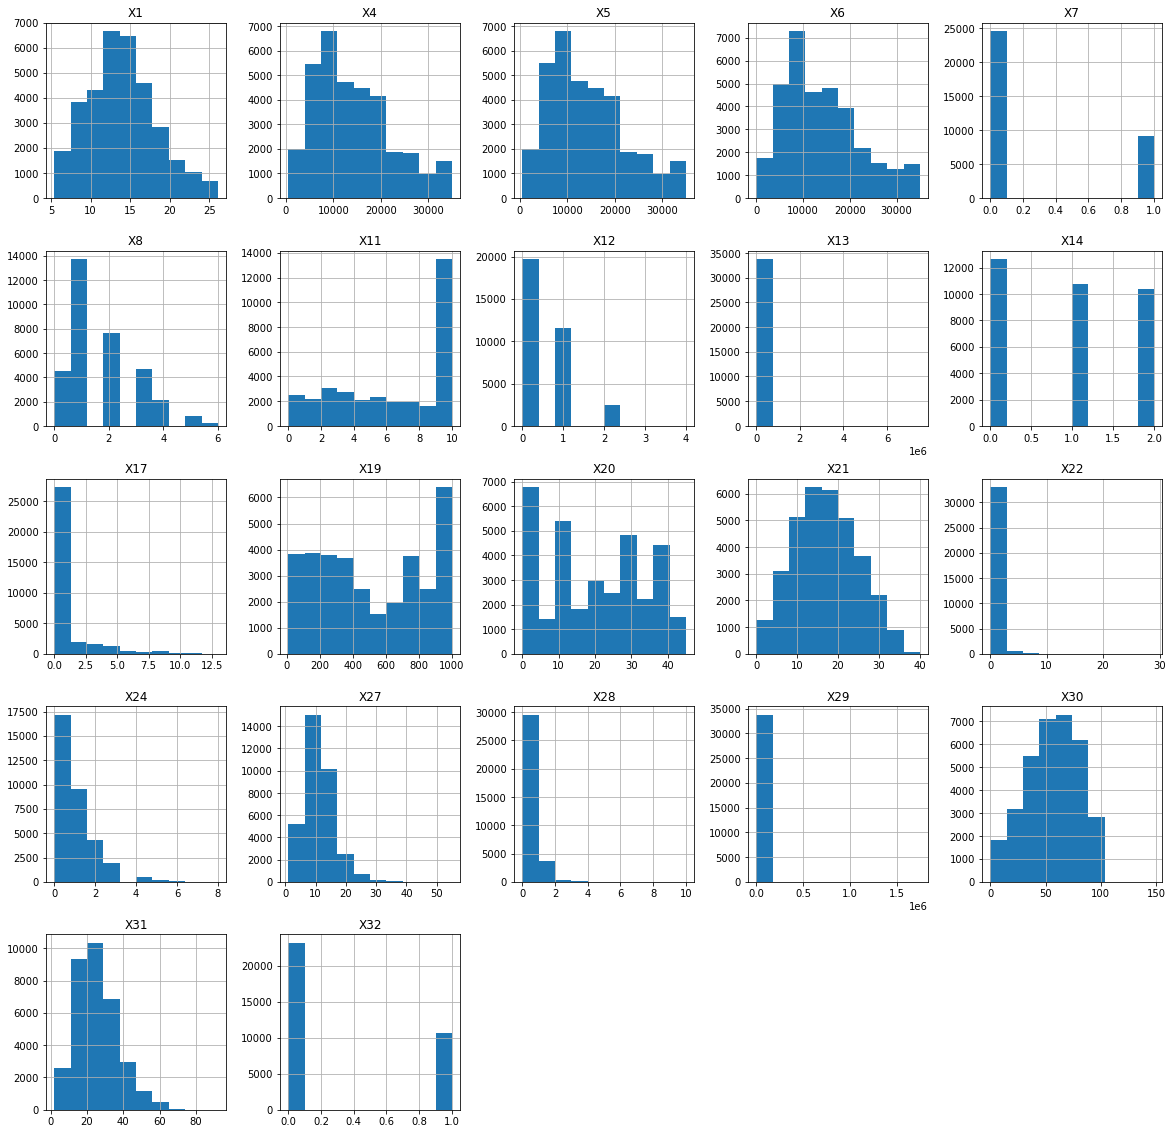

In [37]:
p = df.hist(figsize = (20,20))

### I removed outliers from the dataset to see if it would improve model scoring. While the MSE was slightly better, the accuracy scores were worse, so I will not remove outliers 

In [38]:
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### Remove index column

In [39]:
df.reset_index(drop=True, inplace=True)

## Review updated dataset

In [40]:
df.head()

,X1,X4,X5,X6,X7,X8,X11,X12,X13,X14,...,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,15.31,16425.0,16425.0,16425.0,0,2.0,0.0,1.0,41208.000000,2,...,35,15.06,0.0,0.0,11.0,0.0,19659.0,69.5,23.0,0
1,7.90,15000.0,15000.0,14975.0,0,0.0,2.0,0.0,200000.000000,2,...,29,2.86,0.0,4.0,5.0,0.0,10995.0,41.8,9.0,0
2,12.49,6000.0,6000.0,6000.0,0,1.0,3.0,0.0,53753.000000,1,...,29,14.13,0.0,0.0,15.0,0.0,3671.0,57.0,19.0,0
3,7.12,26000.0,26000.0,26000.0,0,0.0,1.0,1.0,70000.000000,2,...,29,7.90,0.0,0.0,12.0,1.0,13594.0,27.5,51.0,1
4,9.88,18000.0,13125.0,13125.0,0,1.0,10.0,1.0,73011.004033,1,...,4,12.60,0.0,0.0,12.0,0.0,5663.0,37.0,21.0,0


In [41]:
df['X5'].value_counts()

10000.0    2372
12000.0    1856
15000.0    1670
20000.0    1637
35000.0    1143
           ... 
27025.0       1
26950.0       1
22725.0       1
26700.0       1
26125.0       1
Name: X5, Length: 1089, dtype: int64

## Remove loan rate variable and use standard scaling on remaining columns 

In [42]:
# Conduct Standard Scaling 
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["X1"],axis = 1),), columns=['X4', 
'X5', 'X6', 'X7', 'X8', 'X11', 'X12', 'X13', 'X14', 'X17', 'X19', 'X20', 'X21', 'X22', 'X24', 'X27', 'X28', 'X29',
'X30', 'X31', 'X32'])
X.head()

,X4,X5,X6,X7,X8,X11,X12,X13,X14,X17,...,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,0.269530,0.273025,0.281030,-0.610745,0.245803,-1.698507,0.801373,-5.367120e-01,1.296767,-0.527949,...,1.124494,-0.254923,-0.347167,-0.769166,-0.028820,-0.325509,0.176843,0.553590,-0.177850,-0.676388
1,0.095837,0.099109,0.104410,-0.610745,-1.357063,-1.146116,-0.776260,2.143084e+00,1.296767,-0.017241,...,0.666757,-1.832126,-0.347167,3.003056,-1.248929,-0.325509,-0.234880,-0.616436,-1.394943,-0.676388
2,-1.001174,-0.999313,-0.988807,-0.610745,-0.555630,-0.869920,-0.776260,-3.250008e-01,0.081816,2.536297,...,0.666757,-0.375152,-0.347167,-0.769166,0.784586,-0.325509,-0.582925,0.025600,-0.525591,-0.676388
3,1.436629,1.441624,1.447330,-0.610745,-1.357063,-1.422311,0.801373,-5.081413e-02,1.296767,-0.527949,...,0.666757,-1.180560,-0.347167,-0.769166,0.174532,1.817788,-0.111373,-1.220457,2.256337,1.478440
4,0.461507,-0.129729,-0.120933,-0.610745,-0.555630,1.063448,0.801373,2.455802e-16,0.081816,-0.527949,...,-1.240484,-0.572949,-0.347167,-0.769166,0.174532,-0.325509,-0.488263,-0.819185,-0.351720,-0.676388


### Establish target outcome variable for training set

In [43]:
# Establish Target Outcome Variable 
Y = df.X1
Y

0        15.31
1         7.90
2        12.49
3         7.12
4         9.88
         ...  
33793     8.90
33794    15.61
33795    24.99
33796     8.39
33797     7.62
Name: X1, Length: 33798, dtype: float64

# Model Builing: This is where you create your test and train samples, which we fit with a number of different model types to find the best results

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

## Review MSE of models to determine which modeling type to select. 

In [45]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRandomForestRegressor', Pipeline([('RFR', RandomForestRegressor())])))
pipelines.append(('RidgeCV', Pipeline([('RIDGE', RidgeCV())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -4.346861 (0.290211)
ScaledLASSO: -6.073862 (0.292066)
ScaledEN: -6.897415 (0.243956)
ScaledKNN: -6.386111 (0.222842)
ScaledCART: -6.962973 (0.287379)
ScaledGBM: -3.451274 (0.226345)
ScaledRandomForestRegressor: -3.392230 (0.211072)
RidgeCV: -4.347354 (0.290117)


## After reviewing MSE scores, we can see that the RandomForestRegressor and GBM models our the top performers. Let's now review accuracy scores

In [46]:
# Produce and save the model, then load and apply the model.
gbm = GradientBoostingRegressor()
gbm.fit(X_train, Y_train)
gbm_predictions = gbm.predict(X_test)
gbm_score = round(gbm.score(X_test, Y_test) * 100, 2)
gbm_score

81.53

In [47]:
# Produce and save the model, then load and apply the model.
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfr_predictions = rfr.predict(X_test)
rfr_score = round(rfr.score(X_test, Y_test) * 100, 2)
rfr_score

81.99

## RandomForestRegressor gives us the lowest MSE and highest accuracy score, so we will use this on the test data

### Review feature analysis. We will use this information to see if reduction of variables helps improve scoring for one of our higher-scoring models

<AxesSubplot:>

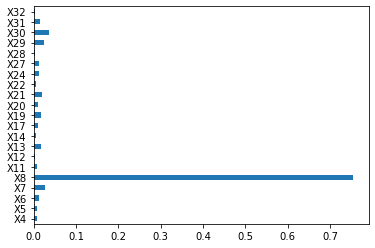

In [48]:
(pd.Series(rfr.feature_importances_, index=X.columns).plot(kind='barh'))

# Save the RandomForestRegressor Model with the best output by using pickle. 

In [74]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfr)

# Then we will be loading that saved model
rfr_from_pickle = pickle.loads(saved_model)

# Incorporation of Test Data

In [75]:
test_df = pd.read_csv('Holdout for Testing.csv')
test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


### Conduct cleaning and preprocessing 

In [76]:
test_df['X8'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)

In [77]:
test_df['X8'].fillna(test_df['X8'].mode()[0], inplace=True)

In [78]:
test_df['X11'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [79]:
test_df['X11'].fillna(test_df['X11'].mode()[0], inplace=True)

In [80]:
test_df['X12'].replace(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'],
                        [0, 1, 2, 3, 4], inplace=True)

In [81]:
test_df['X12'].fillna(test_df['X12'].mode()[0], inplace=True)

In [82]:
test_df['X13'].fillna(test_df['X13'].mean(), inplace = True)

In [83]:
test_df['X30'] = test_df['X30'].str.strip('%')
test_df['X30'] = pd.to_numeric(test_df['X30'])
test_df['X30'].fillna(test_df['X30'].mean(), inplace = True)

In [84]:
test_df.drop(['X2', 'X3', 'X9', 'X10' , 'X15', 'X16', 'X18', 'X23', 'X25', 'X26'], axis=1, inplace=True)

In [85]:
test_df[['X4', 'X5', 'X6']] = test_df[['X4', 'X5', 'X6']].replace('[\$,]', '', regex=True).astype(float)

In [86]:
test_df['X7'].replace([' 36 months', ' 60 months'],
                        [0, 1], inplace=True)

In [87]:
test_df['X14'].replace(['VERIFIED - income', 'not verified', 'VERIFIED - income source'],
                        [0, 1, 2], inplace=True)

In [88]:
test_df['X17'].replace(['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase', 'small_business',
                  'car', 'medical', 'wedding', 'moving', 'vacation', 'house', 'renewable_energy','educational'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)

In [89]:
test_df[['X19']] = test_df['X19'].str.rstrip('xx').astype(float)

In [90]:
test_df.X20 = pd.Categorical(test_df.X20)
test_df['X20'] = test_df['X20'].cat.codes

In [91]:
test_df['X32'].replace(['f', 'w'],
                        [0, 1], inplace=True)

In [92]:
test_df.isnull().sum()

X1     80000
X4         0
X5         0
X6         0
X7         0
X8         0
X11        0
X12        0
X13        0
X14        0
X17        0
X19        0
X20        0
X21        0
X22        0
X24        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
dtype: int64

In [93]:
test_df.dtypes

X1     float64
X4     float64
X5     float64
X6     float64
X7       int64
X8       int64
X11    float64
X12      int64
X13    float64
X14      int64
X17      int64
X19    float64
X20       int8
X21    float64
X22      int64
X24      int64
X27      int64
X28      int64
X29      int64
X30    float64
X31      int64
X32      int64
dtype: object

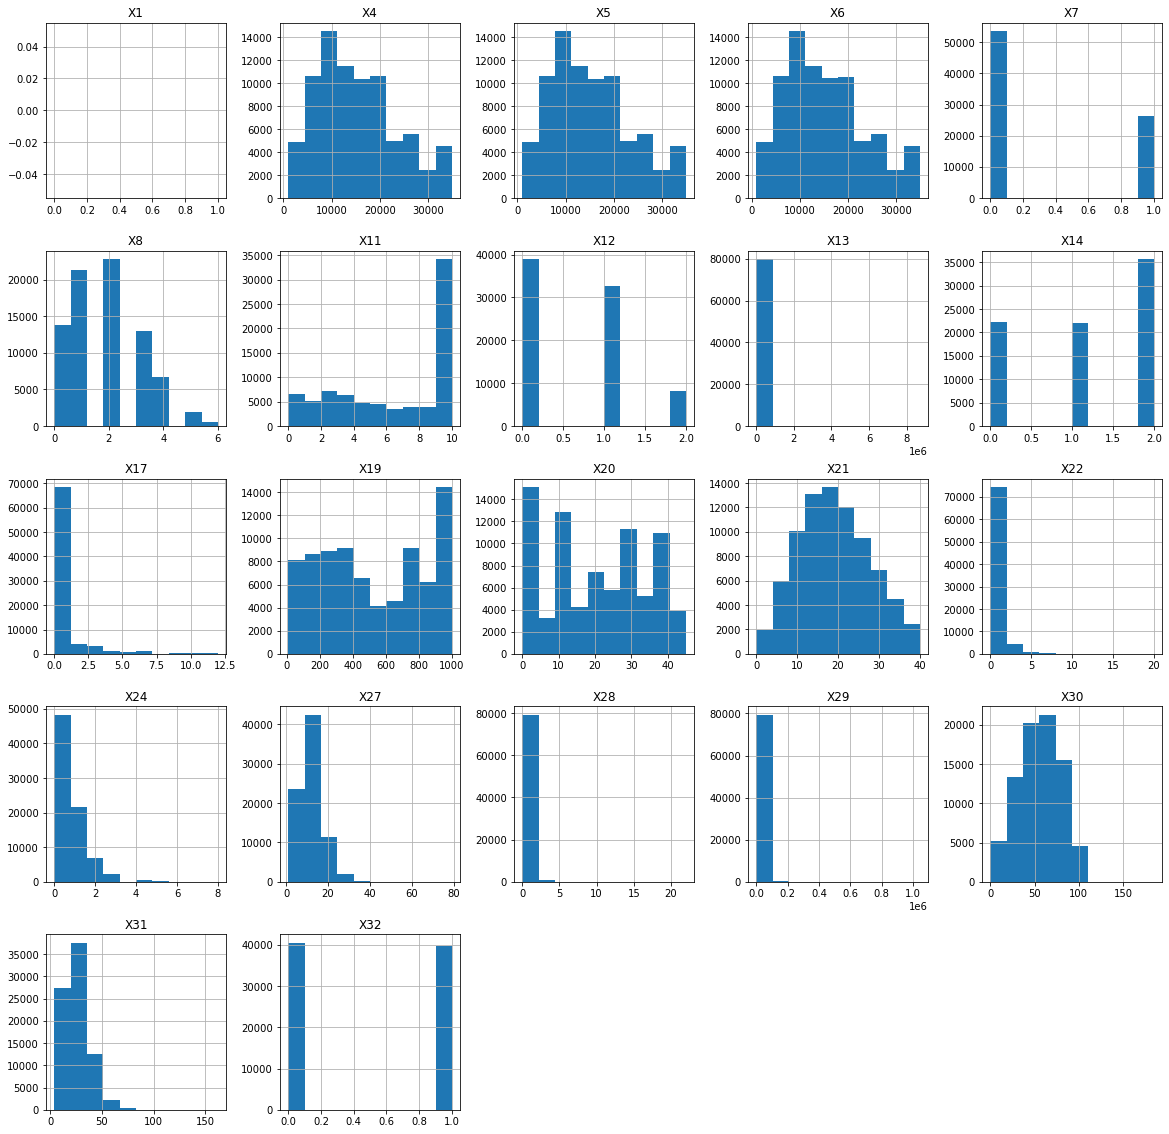

In [94]:
p = test_df.hist(figsize = (20,20))

In [95]:
test_df.reset_index(drop=True, inplace=True)

In [96]:
test_df.head()

,X1,X4,X5,X6,X7,X8,X11,X12,X13,X14,...,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,NaN,6000.0,6000.0,6000.0,0,2,10.0,0,68000.0,0,...,30,28.31,0,1,18,0,19861,64.5,33,0
1,NaN,24000.0,24000.0,24000.0,0,0,8.0,1,110480.0,0,...,4,16.03,0,1,12,0,17001,26.2,36,1
2,NaN,35000.0,35000.0,35000.0,0,2,10.0,0,86000.0,0,...,33,32.49,0,0,16,0,25797,49.9,33,1
3,NaN,10000.0,10000.0,10000.0,1,3,10.0,1,30000.0,2,...,4,32.96,0,1,13,1,9586,43.8,21,1
4,NaN,24000.0,24000.0,24000.0,1,1,10.0,0,82500.0,0,...,33,31.03,0,0,27,0,31842,41.3,43,1


In [97]:
# Conduct Standard Scaling 
sc_X_final = StandardScaler()
X_final =  pd.DataFrame(sc_X_final.fit_transform(test_df.drop(["X1"],axis = 1),), columns=['X4', 
'X5', 'X6', 'X7', 'X8', 'X11', 'X12', 'X13', 'X14', 'X17', 'X19', 'X20', 'X21', 'X22', 'X24', 'X27', 'X28', 'X29',
'X30', 'X31', 'X32'])
X_final.head()

,X4,X5,X6,X7,X8,X11,X12,X13,X14,X17,...,X20,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,-1.101316,-1.101316,-1.101120,-0.701215,0.142434,1.013752,-0.925292,-0.116705,-1.398090,-0.490139,...,0.717263,1.066280,-0.371851,0.479242,1.111393,-0.366451,0.111491,0.368657,0.601190,-0.989060
1,1.031554,1.031554,1.032158,-0.701215,-1.380316,0.473790,0.578209,0.573733,-1.398090,-0.490139,...,-1.266664,-0.360828,-0.371851,0.479242,0.026538,-0.366451,-0.018966,-1.260254,0.848839,1.011061
2,2.334974,2.334974,2.335828,-0.701215,0.142434,1.013752,-0.925292,0.175854,-1.398090,-0.490139,...,0.946178,1.552055,-0.371851,-0.663171,0.749774,-0.366451,0.382259,-0.252286,0.601190,1.011061
3,-0.627345,-0.627345,-0.627058,1.426096,0.903810,1.013752,0.578209,-0.734329,0.997002,-0.490139,...,-1.266664,1.606676,-0.371851,0.479242,0.207347,1.243261,-0.357198,-0.511720,-0.389403,1.011061
4,1.031554,1.031554,1.032158,1.426096,-0.618941,1.013752,-0.925292,0.118967,-1.398090,-0.490139,...,0.946178,1.382382,-0.371851,-0.663171,2.738674,-0.366451,0.658000,-0.618046,1.426685,1.011061


# Once we have cleaned test data exactly like data used to train/test model, we apply RandomForestRegressor model on it

In [98]:
# lastly, after loading that model we will use this to make predictions
loanOutput = rfr_from_pickle.predict(X_final)

# Finally, we merge it back in with the holdout dataset as a model predicted value column

In [99]:
export = pd.DataFrame(loanOutput, columns=['LoanRateModelOutput']) 

In [100]:
export.head(9)

,LoanRateModelOutput
0,14.9169
1,7.3167
2,14.4970
3,17.2125
4,14.1012
5,15.0025
6,14.4021
7,12.3456
8,14.3150


In [101]:
holdout_test = pd.read_csv('Holdout for Testing.csv')

In [102]:
df_export = holdout_test.join(export)
df_export.head(9)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,LoanRateModelOutput
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,1,26.0,NaN,18,0,19861,64.50%,33,f,14.9169
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,1,NaN,NaN,12,0,17001,26.20%,36,w,7.3167
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,0,NaN,NaN,16,0,25797,49.90%,33,w,14.4970
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,1,NaN,114.0,13,1,9586,43.80%,21,w,17.2125
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,0,48.0,NaN,27,0,31842,41.30%,43,w,14.1012
5,NaN,44057008,47073801,"$18,000","$18,000","$18,000",60 months,B,B3,Solutions Development Senior Analyst,...,0,NaN,NaN,8,0,18652,64.80%,21,w,15.0025
6,NaN,41399898,44316683,"$8,000","$8,000","$8,000",36 months,C,C3,Department Manager,...,0,NaN,NaN,7,0,13775,63.20%,10,w,14.4021
7,NaN,43801789,46818598,"$24,000","$24,000","$24,000",36 months,B,B2,Senior pastor,...,1,31.0,NaN,10,0,20417,68.70%,19,w,12.3456
8,NaN,44409120,47416833,"$18,000","$18,000","$18,000",60 months,C,C4,Regulatory Compliance,...,0,72.0,NaN,9,0,3948,66.90%,23,w,14.3150


In [ ]:
#df_export.to_csv(r"C:\Users\Nick's Laptop\Desktop\Data Mining Principles\assignment-3\Loan_Prediction\Results_from_nicholas_petr_loan_predictions.csv", sep=',')